# **2/2568 FRA501: Pattern Recognition**
## **HW1 Clustering**

**Member**
- 65340500037 Pavaris Asawakijtananont
- 65340500058 Anuwit Intet
- 65340500062 Aitthikit Kitcharoennon

### **FYI**
- **This file including with 5 main part, including**
    - `code description` : this part explain how our code work and the process of K-mean clustering (****it just not copy the Instruction****)

Recall from lecture that K-means has two main steps: the points assignment step, and the
mean update step. After the initialization of the centroids, we assign each data point to a
centroid. Then, each centroid is updated by re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like to form K
clusters. We do the following
1. Initialization: Pick K random data points as K centroid locations c1, c2, ..., cK.
2. Assign: For each data point k, find the closest centroid. Assign that data point to the
centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (convergence).
Given the following data points in x-y coordinates (2 dimensional)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
import os


# **Clustering**

## **Code Describtion**
- This section will describe how our code work in this homework :)

### **0. Setup K-Mean data**
- In this work, we use pandas dataframe for managing the data
- in pandas dataframe we 3 columns for contain data, including
    - `x` : data in x-axis
    - `y` : data in y-axis
    - `group` : group from clustering, thia variable will be assigned in next step. In this work, we indicate the cluster for each group with the color following:
        - `0` : Red
        - `1` : Green
        - `2` : Black
        - `3` : Yellow
        - `4` : Purple

Setting data following the instruction

<Axes: xlabel='x', ylabel='y'>

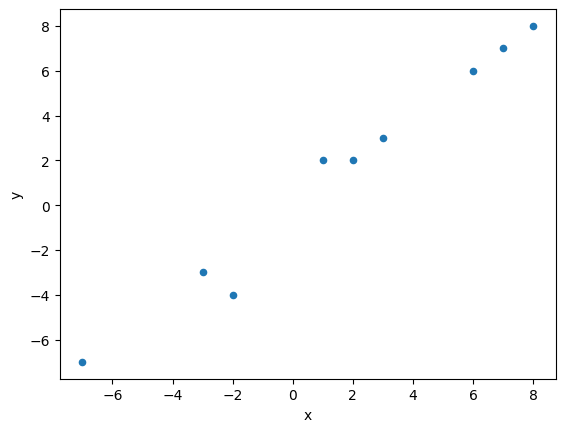

In [16]:
d={ 'x' : [1,3,2,8,6,7,-3,-2,-7],
    'y' : [2,3,2,8,6,7,-3,-4,-7],
    'group' : [None]*9 }

color_map = {
    0: "red",
    1: "green",
    2: "black",
    3: "yellow",
    4: "purple",
    5: "blue",
    6: "orange",
    7: "brown",
    8: "pink"
}

# d['x'] = (d['x'] - np.min(d['x'])) / (np.max(d['x'])-np.min(d['x']))
# d['y'] = (d['y'] - np.min(d['y'])) / (np.max(d['y'])-np.min(d['y']))

df = pd.DataFrame(d)

df.plot.scatter(x='x',y='y')

- Sampling difference position for initial centroid for each clusters
- **Normalized should be done, helping cluster seperation, despite scale after normalization not difference from before**

### **1. Initialization:**
- Pick K random data points as K centroid locations $c_1, c_2, ..., c_K.$
- 

In [17]:
def init_centroid(_df,K,color_map_):
    point = _df[['x', 'y']].sample(n=K).to_numpy()
    centroid = {color_map_[k]: point[k] for k in range(K)}
    return centroid

### **2. Assign:**
- For each data point k, find the closest centroid. Assign that data point to the
centroid. The distance used is typically Euclidean distance.

In [18]:
def euclidean_distance(x1,x2):
    return np.linalg.norm(x2-x1)

In [19]:
def assign(_df , centroid_dict):
    for index, row in df.iterrows():
        group = ''
        maximum = 99 
        for c_ in centroid_dict.keys(): # c_ is centroid
            distance = euclidean_distance([row.x , row.y] , centroid_dict[c_])
            if distance < maximum:
                group = c_
                maximum = distance
            _df.at[index, 'group'] = group

    # return df

### **2. Update:**
- For each centroid, calculate the mean from the data points assigned to it.

In [20]:
def update(_df,centroid_dict):
    '''
    Update centroid
    '''
    for centroid in centroid_dict.keys():
        x = _df[_df['group'] == centroid].x.mean()
        y = _df[_df['group'] == centroid].y.mean()
        if pd.notna(x) and pd.notna(y):
            # print(centroid,x,y)
            centroid_dict[centroid] = np.array([x,y])

---
---

## **Homework**

### **Part 1**
- If the starting points are (3,3), (2,2), and (-3,-3). Describe each assign and update step. What are the points assigned? What are the updated centroids? You may do this calculation by hand or write a program to do it. (5 points)

- Although we should normalize all data before put it in our algorithm, for following the instruction, in this work we will not normolized the data (Intruction give the absolute point location, it will be hard to follow if we normalized them).

#### **1. First step.**

- define the group and centroid for each group, following the instruction

In [7]:
df1 = df.copy()

In [8]:
centroid1 = {
    color_map[0]:np.array([3,3]),
    color_map[1]:np.array([2,2]),
    color_map[2]:np.array([-3,-3]),
    }

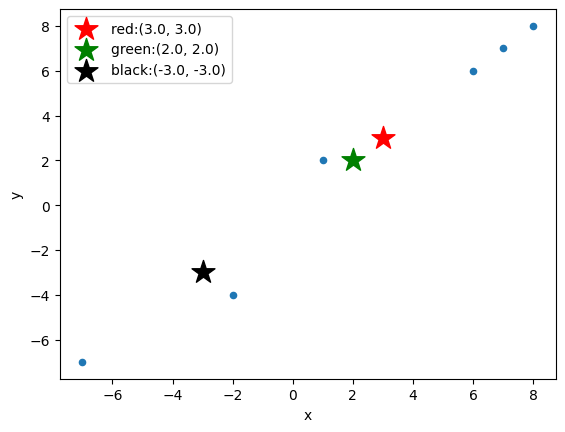

In [9]:
ax = df1.plot.scatter(x='x',y='y')
for i,centroid in enumerate(centroid1.keys()):
    ax.scatter(centroid1[centroid][0],centroid1[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid1[centroid][0]),float(centroid1[centroid][1])}')
    ax.legend()

- The figure illustrate the centroid position, initialized from the given point
- It can be seen that the group can be seperate by using only bare eyes, but other points did not assign to group yet.

#### **2. Assigned.**

- Before centroids update, other point must be assigned into the group

In [10]:
assign(df1,centroid1)

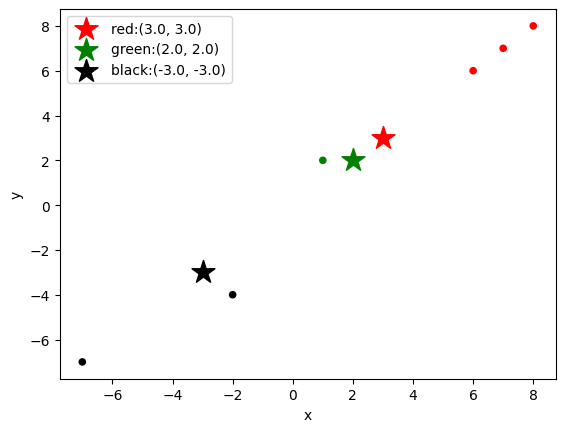

In [11]:
ax = df1.plot.scatter(x='x',y='y',c='group')
for i,centroid in enumerate(centroid1.keys()):
    ax.scatter(centroid1[centroid][0],centroid1[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid1[centroid][0]),float(centroid1[centroid][1])}')
    ax.legend()

- The point had been assigned to each cluster, you see the color in each point, which is the same as the nearest centroid(star).

#### **3. Update centroid.**

In [12]:
df1


,x,y,group
0,1,2,green
1,3,3,red
2,2,2,green
3,8,8,red
4,6,6,red
5,7,7,red
6,-3,-3,black
7,-2,-4,black
8,-7,-7,black


In [13]:
update(df1,centroid1)

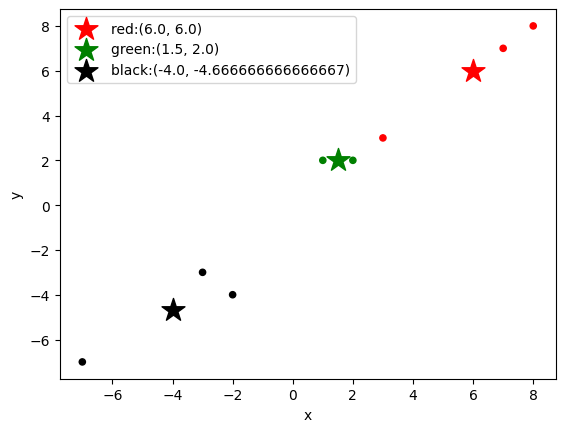

In [14]:
ax = df1.plot.scatter(x='x',y='y',c='group')
for i,centroid in enumerate(centroid1.keys()):
    ax.scatter(centroid1[centroid][0],centroid1[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid1[centroid][0]),float(centroid1[centroid][1])}')
    ax.legend()

- After updated centroid by mean every point in their cluster. It is very clear the the red centroid move to upper right of figure (moving to the mean of red cluster)
- It be seen that red point at $[3,3]$ (next to upper right green star), it should be in the green cluster in next step(assign step).

### **Conslusion**
- the conclusion of this work the **`centroids`** of 3 groups are moved to 
    - `Red` : [6.0 , 6.0]
    - `Green` : [1.5 , 2.0]
    - `Black` : [-4.0 , 4.67]

---

## **Part 2**
- If the starting points are (-3,-3), (2,2), and (-7,-7), what happens? (3 points)

In [15]:
df2 = df.copy()
centroid2 = {
    color_map[0]:np.array([2,2]),
    color_map[1]:np.array([-3,-3]),
    color_map[2]:np.array([-7,-7]),
    }

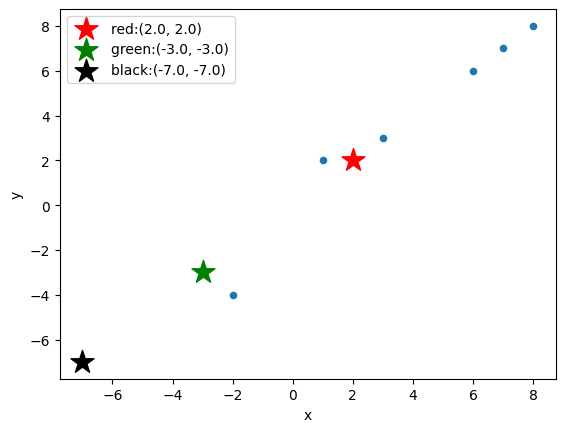

In [16]:
ax = df2.plot.scatter(x='x',y='y')
for i,centroid in enumerate(centroid1.keys()):
    ax.scatter(centroid2[centroid][0],centroid2[centroid][1],s=300 ,c=centroid,marker='*',label=f'{centroid}:{float(centroid2[centroid][0]),float(centroid2[centroid][1])}')
    ax.legend()

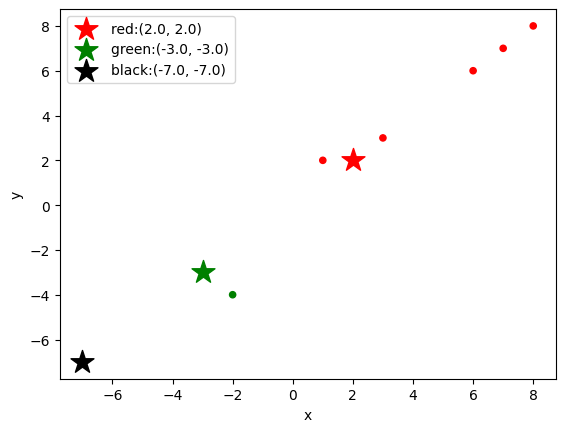

In [17]:
assign(df2,centroid2)
ax = df2.plot.scatter(x='x',y='y',c='group')
for i,centroid in enumerate(centroid2.keys()):
    ax.scatter(centroid2[centroid][0],centroid2[centroid][1],s=300 ,c=centroid,marker='*',label=f'{centroid}:{float(centroid2[centroid][0]),float(centroid2[centroid][1])}')
    ax.legend()

- Next step is assign point to the group.

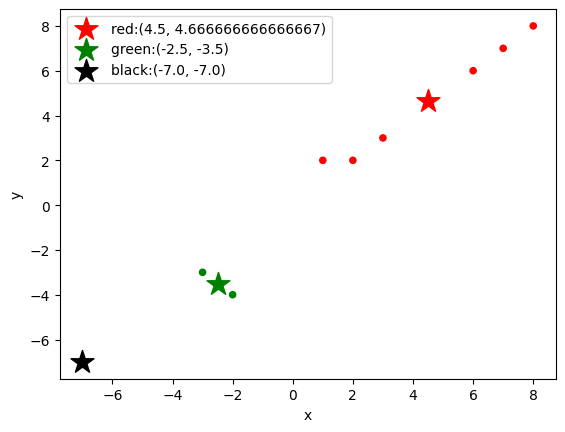

In [18]:
update(df2,centroid2)
ax = df2.plot.scatter(x='x',y='y',c='group')
for i,centroid in enumerate(centroid1.keys()):
    ax.scatter(centroid2[centroid][0],centroid2[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid2[centroid][0]),float(centroid2[centroid][1])}')
    ax.legend()

- According to the figure, this demonstrate the difference(quite bad) for initial cluster, it seem that the upper right has a larger group than previous part. It contain 6 points from the all data point
- Meanwhile, in left lower group it contain only 1, which is the initial of cluster, is the data in dataset. Moreover, in this point there is not other point around it. Then the point did not update.
- Although in upper right can point ([6,6],[8,8]) can be categorized into other, we have only 3 cluster and the nearest cluster from those point is red, that a reason why we cannot has a good cluster (We will qualify how good is it in next part) 

---

## **Part 3**
Between the two-starting set of points in the previous two questions, which one do you
think is better? How would you measure the ‘goodness’ quality of a set of starting points? (2
points)

#### **1. Intuitive Qualify**

- From the following results in previous part, if we use bare-eye to qualify the goodness, initialize in part 1 is better than part 2. It is very intuitively to see the group in lower dimension e.g. in this homework. In other dataset, `we should regard the dimensional of dataset, which we cannot visualize cluster in higher dimension`.
- To address this challenges, `metrice must be used instead bare-eye`.

##### **Make them converge**
- Before we evaluate the quality of clustering, we need to ensure that all clusters are properly formed. In Part 1, we can see that the data points have not been assigned yet. After assigning the points, the cluster structure may change.
- In this homework we use 5 iteration to update the centroid.

##### **First Initialized**

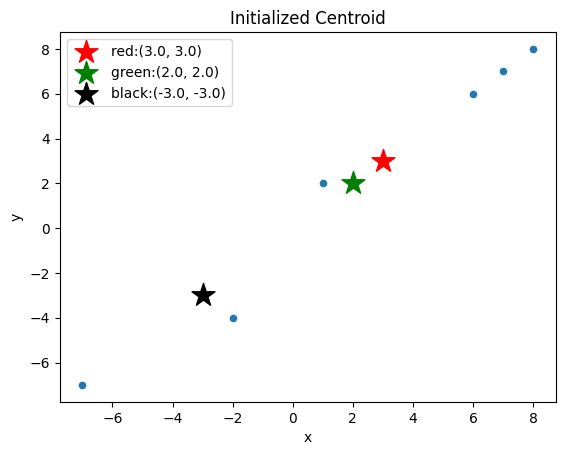

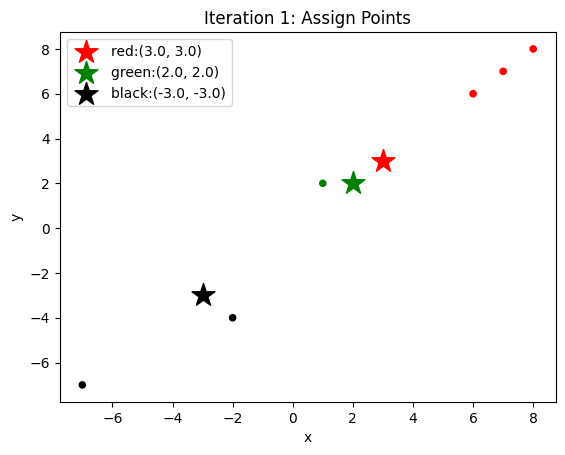

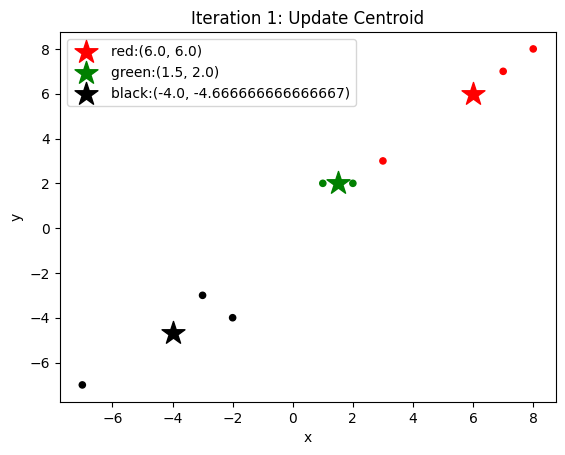

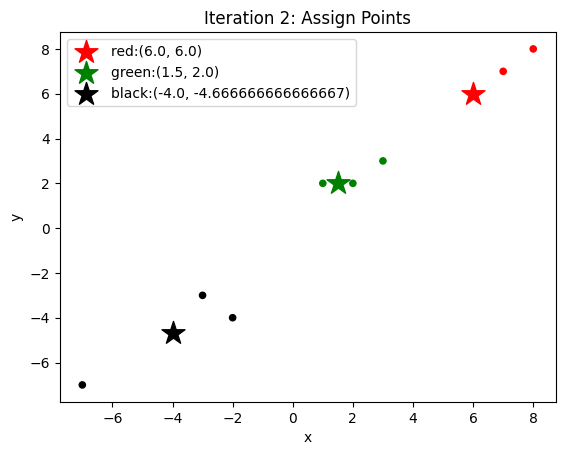

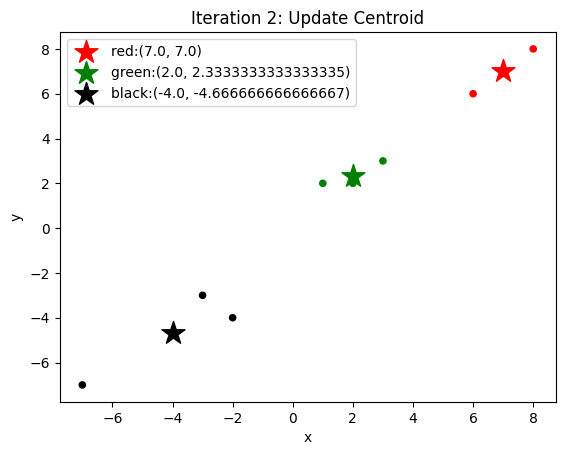

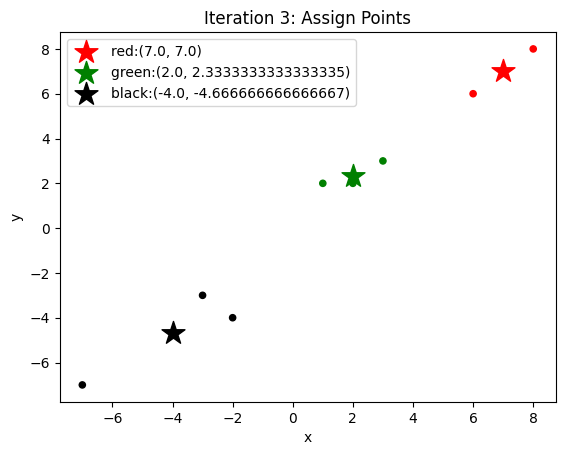

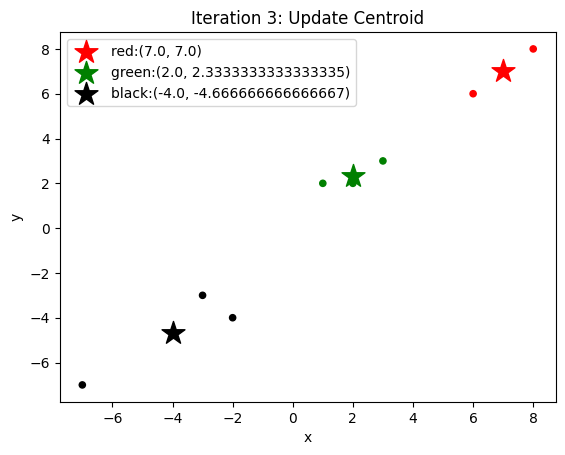

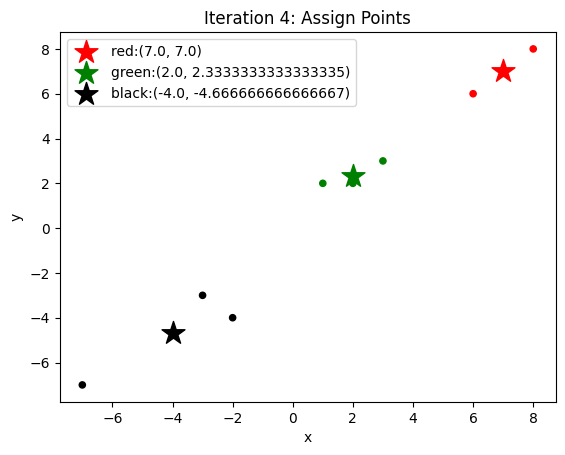

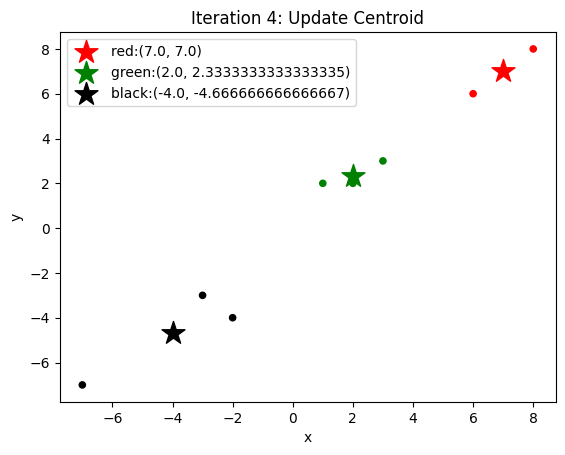

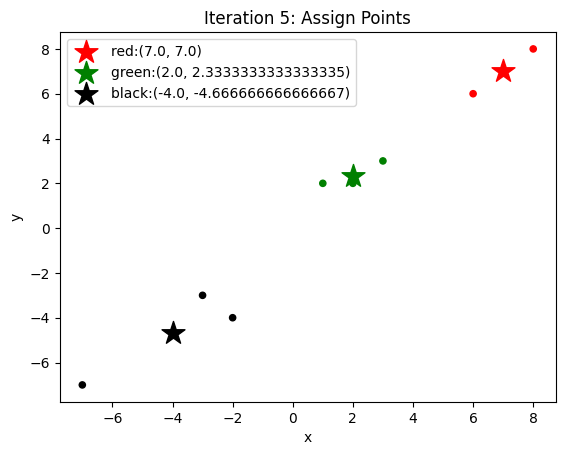

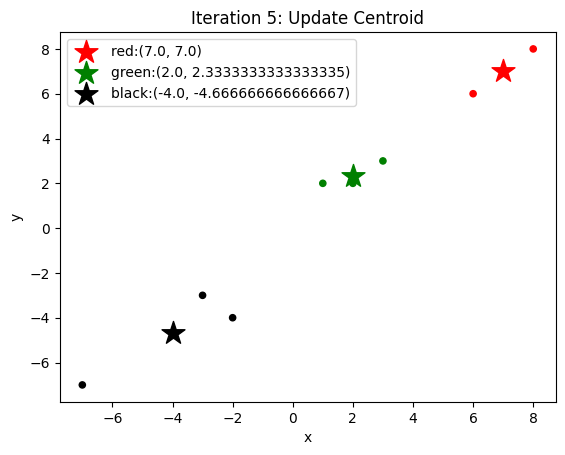

In [19]:
# df3_1 = df.copy()
# centroid3_1 = {
#     color_map[0]:np.array([3,3]),
#     color_map[1]:np.array([2,2]),
#     color_map[2]:np.array([-3,-3]),
#     }

# ax = df3_1.plot.scatter(x='x',y='y',title="Initialized Centroid")
# for i,centroid in enumerate(centroid3_1.keys()):
#     ax.scatter(centroid3_1[centroid][0],centroid3_1[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid3_1[centroid][0]),float(centroid3_1[centroid][1])}')
#     ax.legend()

# for i in range(5):
#     assign(df3_1,centroid3_1)
#     update(df3_1,centroid3_1)
#     ax = df3_1.plot.scatter(x='x',y='y',c='group',title=f'1 :Interation Update Centroid:{i}')
#     for i,centroid in enumerate(centroid3_1.keys()):
#         ax.scatter(centroid3_1[centroid][0],centroid3_1[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid3_1[centroid][0]),float(centroid3_1[centroid][1])}')
#         ax.legend()
#     plt.show()

df3_1 = df.copy()
centroid3_1 = {
    color_map[0]:np.array([3,3]),
    color_map[1]:np.array([2,2]),
    color_map[2]:np.array([-3,-3]),
}

# ----- Initial Plot -----
ax = df3_1.plot.scatter(x='x',y='y',title="Initialized Centroid")
for j, centroid in enumerate(centroid3_1.keys()):
    ax.scatter(
        centroid3_1[centroid][0],
        centroid3_1[centroid][1],
        s=300,
        c=color_map[j],
        marker='*',
        label=f'{centroid}:{float(centroid3_1[centroid][0]),float(centroid3_1[centroid][1])}'
    )
ax.legend()
plt.show()


# ----- Iterations -----
for i in range(5):

    # ---- ASSIGN ----
    assign(df3_1,centroid3_1)
    ax = df3_1.plot.scatter(
        x='x',y='y',c='group',
        title=f'Iteration {i+1}: Assign Points'
    )

    for j, centroid in enumerate(centroid3_1.keys()):
        ax.scatter(
            centroid3_1[centroid][0],
            centroid3_1[centroid][1],
            s=300,
            c=color_map[j],
            marker='*',
            label=f'{centroid}:{float(centroid3_1[centroid][0]),float(centroid3_1[centroid][1])}'
        )
    ax.legend(fontsize=10)
    plt.show()

    # ---- UPDATE ----
    update(df3_1,centroid3_1)
    ax = df3_1.plot.scatter(
        x='x',y='y',c='group',
        title=f'Iteration {i+1}: Update Centroid'
    )

    for j, centroid in enumerate(centroid3_1.keys()):
        ax.scatter(
            centroid3_1[centroid][0],
            centroid3_1[centroid][1],
            s=300,
            c=color_map[j],
            marker='*',
            label=f'{centroid}:{float(centroid3_1[centroid][0]),float(centroid3_1[centroid][1])}'
        )
    ax.legend(fontsize=10)
    plt.show()

- According to figure, it can be seen that the centroids of every cluster do not change after they are updated in iteration 2, which `Green` was updated clearly cause of its got new point in its group.
- The updated cluster are following:
    - `Red` : [3,3] --> [7.0,7.0]
    - `Green` : [2,2] --> [2.0,2.33]
    - `Black` : [-3,-3] --> [-4.0,4.67]

***Note: in Iteration 0 show the datapoint before assign the new point to the group***

##### **Second Initialized**

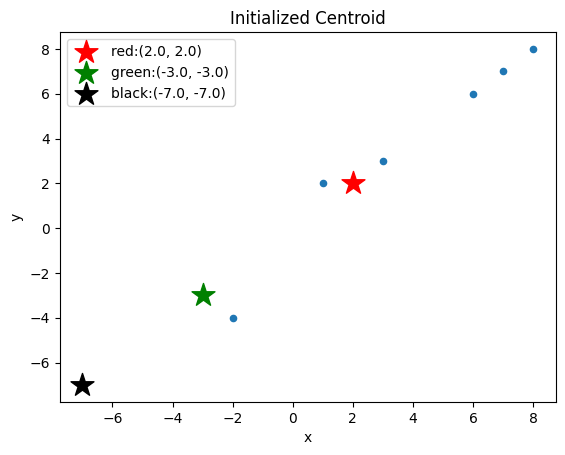

-----------------------------


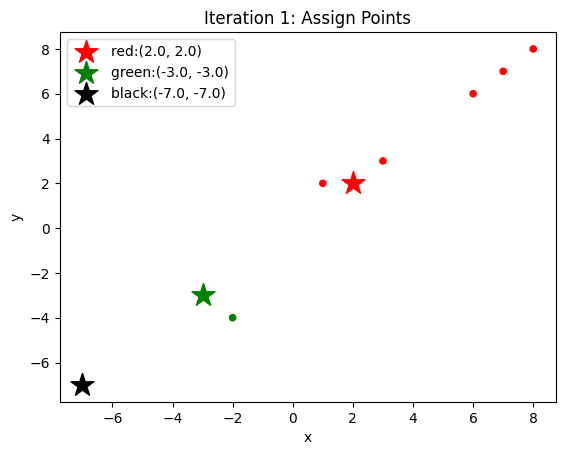

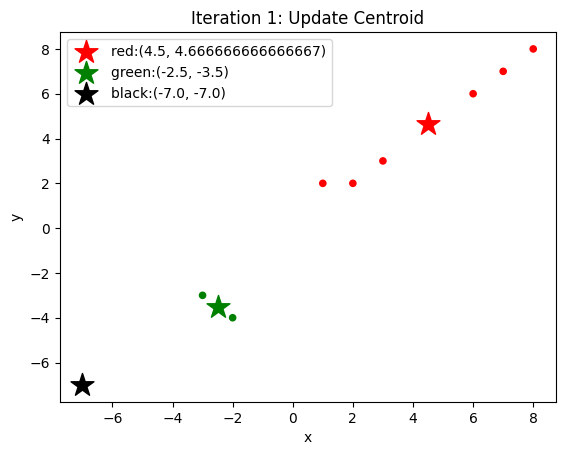

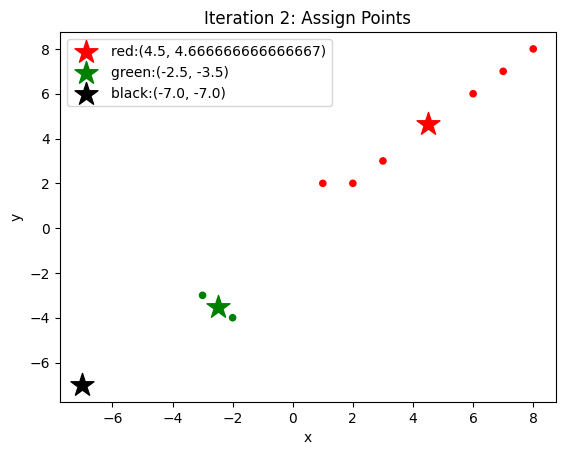

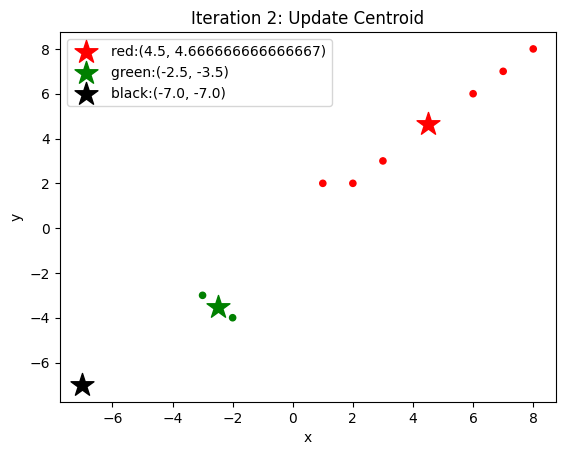

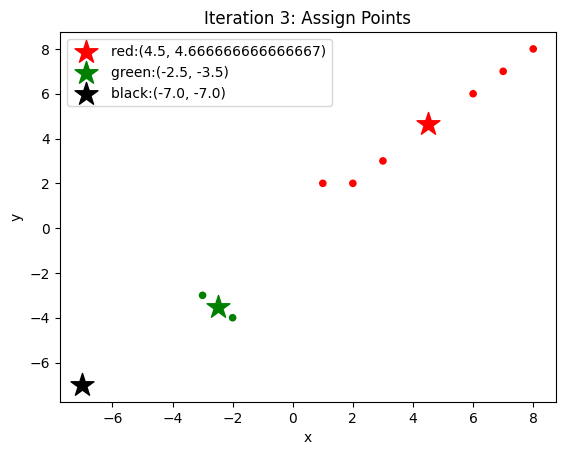

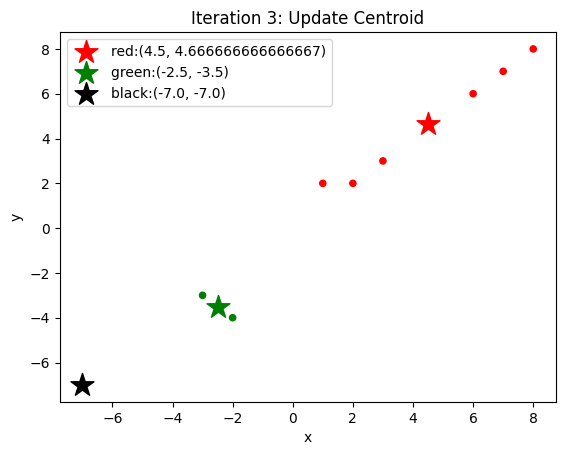

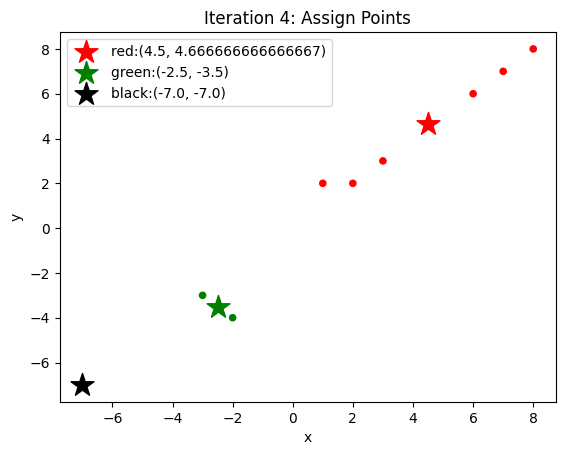

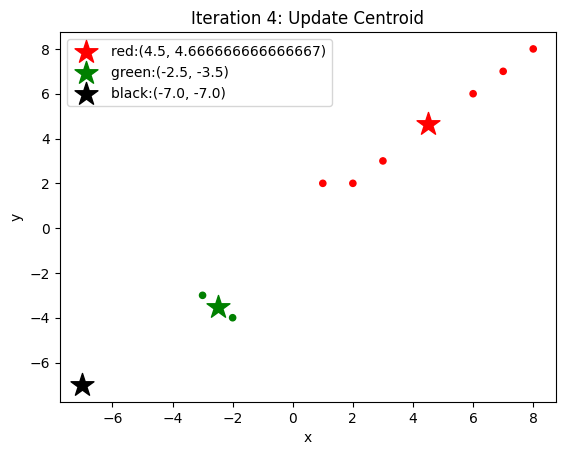

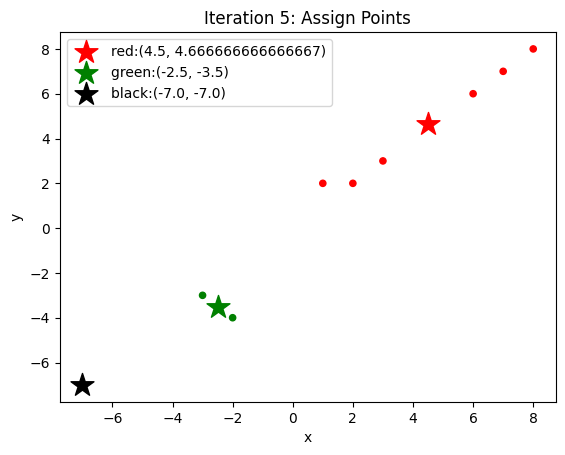

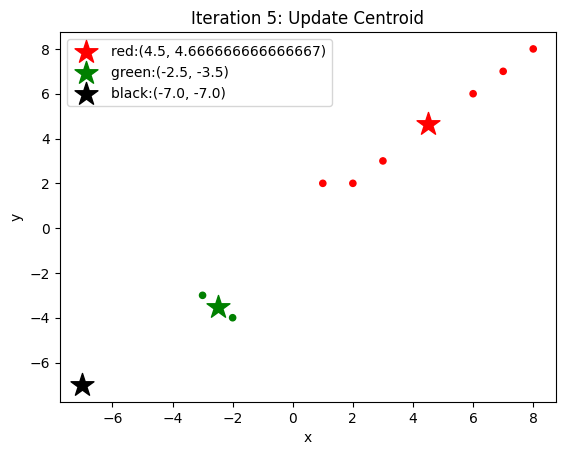

In [20]:
# df3_2 = df.copy()
# centroid3_2 = {
#     color_map[0]:np.array([2,2]),
#     color_map[1]:np.array([-3,-3]),
#     color_map[2]:np.array([-7,-7]),
#     }

# ax = df3_2.plot.scatter(x='x',y='y',title="Initialized Centroid")
# for i,centroid in enumerate(centroid3_2.keys()):
#     ax.scatter(centroid3_2[centroid][0],centroid3_2[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid3_2[centroid][0]),float(centroid3_2[centroid][1])}')
#     ax.legend()
# print("-----------------------------")

# for i in range(5):
#     assign(df3_2,centroid3_2)
#     update(df3_2,centroid3_2)

#     ax = df3_2.plot.scatter(x='x',y='y',c='group',title=f'2 : Interation:{i}')
#     for i,centroid in enumerate(centroid3_2.keys()):
#         ax.scatter(centroid3_2[centroid][0],centroid3_2[centroid][1],s=300 ,c=color_map[i],marker='*',label=f'{centroid}:{float(centroid3_2[centroid][0]),float(centroid3_2[centroid][1])}')
#         ax.legend()

df3_2 = df.copy()
centroid3_2 = {
    color_map[0]:np.array([2,2]),
    color_map[1]:np.array([-3,-3]),
    color_map[2]:np.array([-7,-7]),
}

# ----- Initial Plot -----
ax = df3_2.plot.scatter(x='x',y='y',title="Initialized Centroid")
for j, centroid in enumerate(centroid3_2.keys()):
    ax.scatter(
        centroid3_2[centroid][0],
        centroid3_2[centroid][1],
        s=300,
        c=color_map[j],
        marker='*',
        label=f'{centroid}:{float(centroid3_2[centroid][0]),float(centroid3_2[centroid][1])}'
    )
ax.legend()
plt.show()

print("-----------------------------")

# ----- Iterations -----
for i in range(5):

    # ---- ASSIGN ----
    assign(df3_2,centroid3_2)
    ax = df3_2.plot.scatter(
        x='x',y='y',c='group',
        title=f'Iteration {i+1}: Assign Points'
    )

    for j, centroid in enumerate(centroid3_2.keys()):
        ax.scatter(
            centroid3_2[centroid][0],
            centroid3_2[centroid][1],
            s=300,
            c=color_map[j],
            marker='*',
            label=f'{centroid}:{float(centroid3_2[centroid][0]),float(centroid3_2[centroid][1])}'
        )
    ax.legend(fontsize=10)
    plt.show()

    # ---- UPDATE ----
    update(df3_2,centroid3_2)
    ax = df3_2.plot.scatter(
        x='x',y='y',c='group',
        title=f'Iteration {i+1}: Update Centroid'
    )

    for j, centroid in enumerate(centroid3_2.keys()):
        ax.scatter(
            centroid3_2[centroid][0],
            centroid3_2[centroid][1],
            s=300,
            c=color_map[j],
            marker='*',
            label=f'{centroid}:{float(centroid3_2[centroid][0]),float(centroid3_2[centroid][1])}'
        )
    ax.legend(fontsize=10)
    plt.show()


- The result is similar with in part 2, the clusters are not move after updating first time.

#### **2. Qualify Goodness**

- To qualify goodness of the cluster we're considering 3 variables including
    - **`Within-Cluster-Sum-of-Squares (WCSS)`**: how well you algorithm separates out the data into several clusters `(Cohesion)`
    - **`Between Cluster Sums of Squares (BCSS)`**: how well you algorithm separates out the data into several clusters `(Seperation)`
    - **`Silhouette coefficient`** : calculating from WCSS and BCSS
    - **`Fraction of explained variance`**

**Within-Cluster-Sum-of-Squares (WCSS)**
- Sum of square from between every point and centroid

$$
WCSS = \sum^{N_c}_{i=1} \sum_{x \in C_i} d(\bm{x}, \bm{\bar{x}_{C_i}})^2
$$

- $C_i$ : Cluster
- $N_c$ : Number of cluster 
- $\bm{\bar{x}_{C_i}}$ : Cluster centroid
- $\bm{x}$ : Point in each centroid

In [22]:
def WCSS(df, centroid_dict):
    result = {centroid:int for centroid in centroid_dict.keys()}
    for centroid in centroid_dict.keys():
        distance = 0
        for index, row in df[df['group'] == centroid].iterrows():
            distance += euclidean_distance([row.x , row.y] , centroid_dict[centroid])
            # print(centroid,index, distance)
        result[centroid] = distance
    
    wcss = 0
    for key,val in result.items():
        wcss += val
    
    return result, wcss

**Between Cluster Sums of Squares (BCSS)**

$$
BCSS = \sum^{N_c}_{i=1} |C_i| \cdot d(\bm{\bar{x}}, \bm{\bar{x}_{C_i}})^2
$$

- $C_i$ : Cluster
- $N_c$ : Number of cluster 
- $\bm{\bar{x}_{C_i}}$ : Cluster centroid
- $\bm{\bar{x}}$ : sample mean

In [23]:
def BCSS(df, centroid_dict):
    result = {centroid:int for centroid in centroid_dict.keys()}
    s_distact = 0
    sample_mean = [df.x.mean() , df.y.mean()]
    for centroid in centroid_dict.keys():
        n_k = (df["group"] == centroid).sum()
        distance = euclidean_distance(sample_mean , centroid_dict[centroid])
        s_distact += n_k * distance
    return s_distact

**Silhouette coefficient**

- Silhouette coefficient is calculated based on BCSS and WCSS
- Range between [0,1]
    - `0` : Bad Cluster
    - `1` : Good Cluster

In [24]:
def silhoutte(a,b):
    '''
    a = cohesion (WCSS)
    b = seperation (BCSS)
    '''
    return (b-a)/(max(b,a))

**Fraction of explained variance**

- Fraction of explained variance can calulate with difference formulation such as 

<center>
    <img src="figures/explained_var.png" width="600">
    <p> Explained variance formulation *ref:Aj.Por*.</p>
</center>

- In this work, we'll use other formulator which can calculate from WCSS and BCSS

$$
    F = \frac{BCSS}{WCSS+BCSS}
$$

*ref : https://wasrek.medium.com/my-note-on-basic-ml-1d1d4b2e7554*

In [25]:
def explained_variance(BCSS, WCSS):
    return BCSS / (WCSS+BCSS)


##### **Answer**

<p align="center">
  <img src="figures/init1.png" width="40%">
  <img src="figures/init2.png" width="40%">
</p>

In [25]:
_ , wcss1 = WCSS(df3_1 , centroid3_1)
_ , wcss2 = WCSS(df3_2 , centroid3_2)
print (f"Compare WCSS (1,2): {wcss1} , {wcss2}")

bcss1 = BCSS(df3_1 , centroid3_1)
bcss2 = BCSS(df3_2 , centroid3_2)
print (f"Compare BCSS (1,2): {bcss1} , {bcss2}")

sc1 , sc2 = silhoutte(wcss1 , bcss1) , silhoutte(wcss2 , bcss2)
print (f"Compare Silhoutte coeff. (1,2): {sc1} , {sc2}")

ev1 , ev2 = explained_variance(bcss1 , wcss1) , explained_variance(bcss2 , wcss2)
print (f"Compare explained_variance. (1,2): {ev1} , {ev2}")


Compare WCSS (1,2): 13.270123925348127 , 21.971875715522874
Compare BCSS (1,2): 50.65058737947679 , 50.528499513316575
Compare Silhoutte coeff. (1,2): 0.738006514595227 , 0.5651587534331536
Compare explained_variance. (1,2): 0.7923971173902368 , 0.6969412138051553


| Metric                     | init 1 | init 2 |
|---------------------------|--------------|--------------|
| WCSS                      | 13.2701      | 21.9719      |
| BCSS                      | 50.6506      | 50.5285     |
| Silhouette Coefficient    | 0.7380       | 0.5652      |
| Explained Variance        | 0.7923971173902368       | 0.6969412138051553      |

**Result Analysis**

**Within-Cluster Sum of Squares (WCSS):**  
- According to the results table, the WCSS value shows that init 1 has a lower WCSS than init 2, indicating that the clusters obtained from init **1 exhibit better cohesion** (i.e., data points are more compact within each cluster).

**Between-Cluster Sum of Squares (BCSS):**  
- In contrast, the BCSS values for both initial conditions are very similar, suggesting that there is **no significant difference in cluster separation** between `init 1` and `init 2`.

**Silhouette Coefficient:**
- Looking at the Silhouette Coefficient, a clear difference can be observed between the two initializations. init 1 achieves a higher Silhouette Coefficient, indicating that it provides better cluster separation and more well-defined cluster boundaries compared to init 2.

**Explained Variance:**  
- The explained variance for `init 1` (0.7924) is higher than for `init 2` (0.6969). This means that `init 1` explains a larger proportion of the total variance in the dataset through its clustering structure, reflecting a better balance between cluster compactness and separation.

**Conclusion:**  
Considering BCSS, explained variance, WCSS, and Silhouette Coefficient together, **`init 1` remains the preferable initialization** due to better cohesion and clearer cluster structure.

---
---


#### **Part 4**
- What would be the best K for this question? Describe your reasoning. (5 points)

##### **Answer**

- We will use elbow method to identify best K for this question, to acheive this we'll use difference 3 variable, including (Silhoueette Coefficient, Fraction of explained variance, WCSS).
- use maximum K as the number of samples 

In [26]:
max_K = 9
test_iteration = 5

**Plot Function**

In [27]:
def plot_elbow(value_to_plot,title:str , filename="elbow_plot.png"):
    plt.figure(figsize=(15, 4))   # width, height in inches
    num_k = np.arange(len(value_to_plot[0]))+1
    
    for i in range(len(value_to_plot)):
        plt.subplot(1,3,i+1)
        plt.plot(num_k,value_to_plot[i],'*-', markersize=10)
        plt.title(title[i])
        
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # 👈 SAVE HERE
    plt.show()

##### ****Run K-mean Clustering with difference $\bm{K}$****

- In this part we will random centroid for every K (maximum with 9) and we test with 5 iterations, for observe the best K for each random runs

In [ ]:
for iterate in range(test_iteration):
    df4_1 = []
    for k in range(max_K):
        df4_1.append(df.copy())

    centroid4_1 = [init_centroid(df4_1[i],i+1,color_map) for i in range(max_K)]

    # ax = df4_1.plot.scatter(x='x',y='y',title="Initialized Centroid")
    for i in range(max_K):
        for j in range(5):
            assign(df4_1[i],centroid4_1[i])
            update(df4_1[i],centroid4_1[i])
            
    wcss4_1 = [WCSS(df4_1[i],centroid4_1[i])[1] for i in range(max_K)]
    bcss4_1 = [BCSS(df4_1[i],centroid4_1[i]) for i in range(max_K)]

    var4_1 = [explained_variance(bcss4_1[i],wcss4_1[i]) for i in range(max_K)]
    sc4_1 = [silhoutte(wcss4_1[i],bcss4_1[i]) for i in range(max_K)]

    # plot_elbow([wcss4_1,sc4_1,var4_1] , ["WCSS","Silhoutte","Fraction of Explained Variance"] , filename=f"figures/ex1/elbow_iter_{iterate}.png")

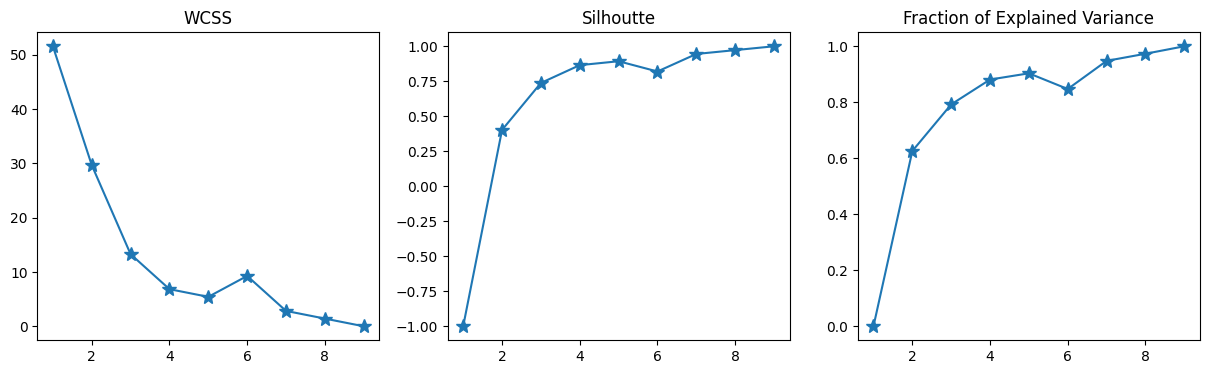
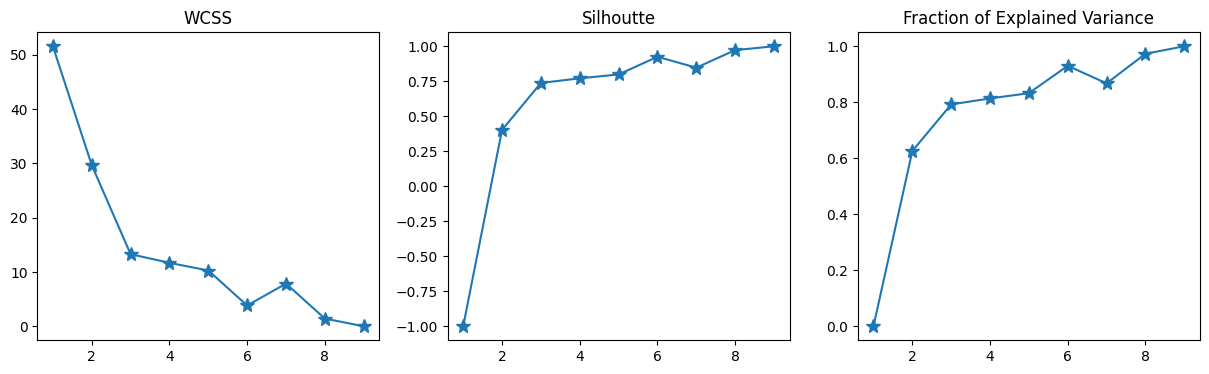
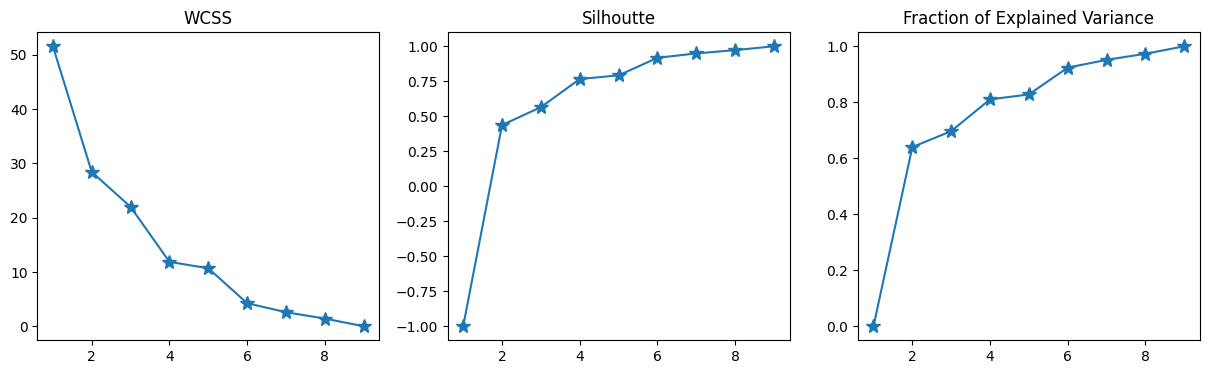
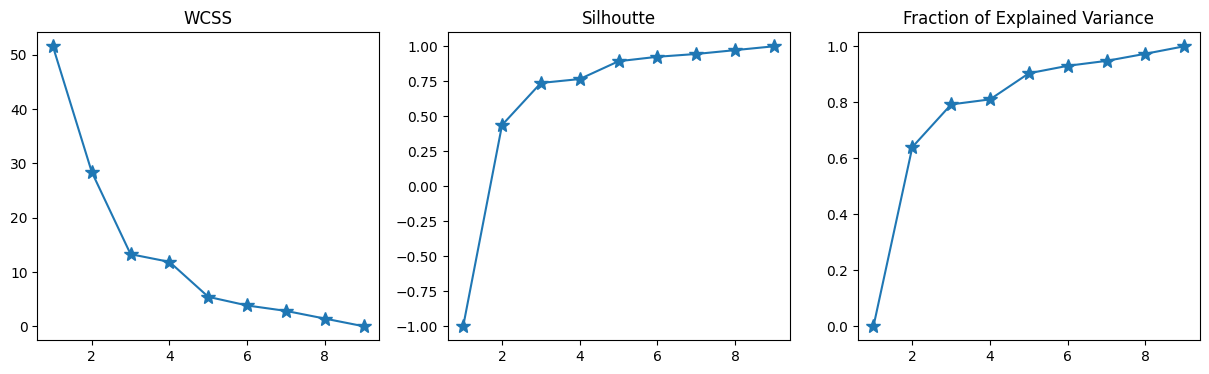
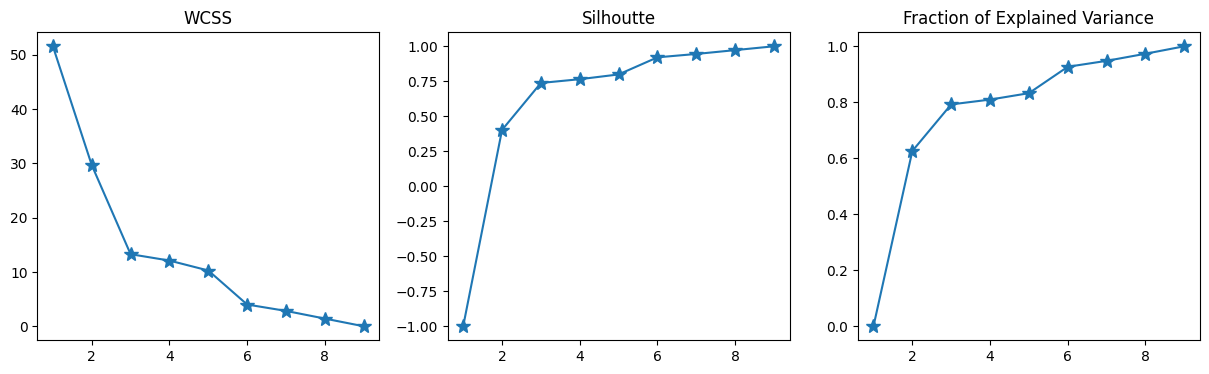

##### **Results**

- According to the results, we use the elbow method to select the best **K** for this dataset. The model is updated 5 times and tested with a maximum **K** value of 9. We use three different variables (**WCSS**, **Silhouette Coefficient**, and **Fraction of Explained Variance**) to observe the trend of each metric across different values of **K**.  

- **`WCSS`** shows the cohesion within each cluster. It demonstrates that a higher **K** can reduce the WCSS value, meaning higher cohesion within groups and lower within-cluster variance.  

- **`Silhouette Coefficient`** and **`Fraction of Explained Variance`** show similar trends, where both generally increase as **K** becomes larger and reach their maximum at **K = 1**. The Silhouette Coefficient is used to analyze both cohesion and separation in clustering, while the **Fraction of Explained Variance** tells us how well the variance between groups explains the total variance in the data. However, these two variables tend to display similar patterns.  

- In conclusion, we can use these three variables to determine the best **K** for this algorithm. The best **K** is **`3`**, which is the value before only tiny differences are observed between successive **K** values.  

- Moreover, in most trials, the best **K** is **`3`** before the tiny difference appears, but sometimes it can differ (e.g., the best **K** may be between 2–5 or another value). This depends on the initial conditions; poor initialization can lead to worse clustering results, higher variance, and lower cohesion and separation.


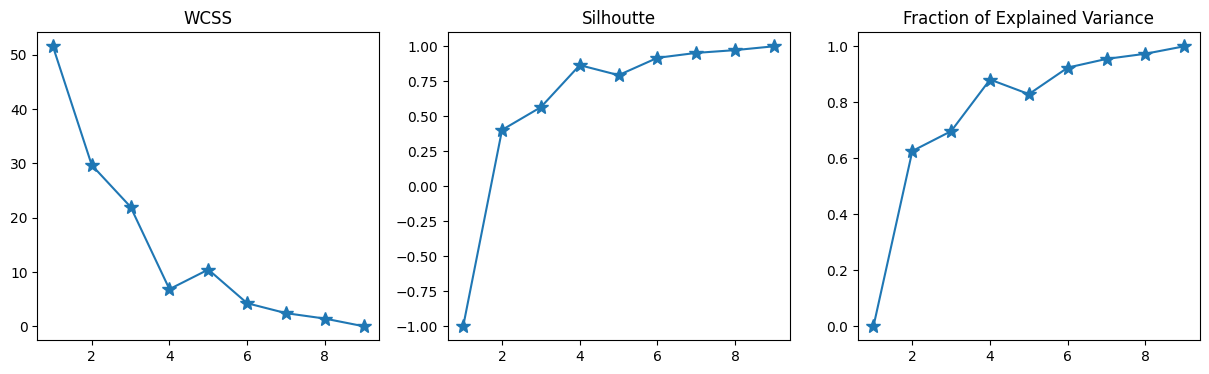

- There is an example of a bad initial condition: although in previous results we identified the best **K** as **`3`**, the figure illustrates that it has two elbows. The clustering result at **K = 5** is worse than at **K = 4**, which provides evidence of a poor initialization condition.

In [93]:
import pandas as pd
import numpy as np

# 1. Initialize an empty list to collect all results
all_results = []
max_K = 9 # Adjust this to your desired K range

# Number of iterations requested (30 random seeds)
for iterate in range(100):
    
    # --- VARY THE RANDOM SEED HERE ---
    np.random.seed(iterate) 
    
    df4_2 = []
    for k in range(max_K):
        df4_2.append(df.copy())

    # init_centroid should now produce different results for each 'iterate'
    centroid4_2 = [init_centroid(df4_2[i], i+1, color_map) for i in range(max_K)]

    for i in range(max_K):
        # Training/Optimization steps
        for j in range(5):
            assign(df4_2[i], centroid4_2[i])
            update(df4_2[i], centroid4_2[i])
            
        current_wcss = WCSS(df4_2[i], centroid4_2[i])[1]
        current_bcss = BCSS(df4_2[i], centroid4_2[i])
        current_var = explained_variance(current_bcss, current_wcss)
        current_sc = silhoutte(current_wcss, current_bcss)
        
        # Store everything in the list
        all_results.append({
            'Iteration': iterate,
            'K': i + 1,
            'WCSS': current_wcss,
            'BCSS': current_bcss,
            'Variance': current_var,
            'Silhouette': current_sc
        })

# 3. Convert to DataFrame
df_results = pd.DataFrame(all_results)

In [ ]:
# import seaborn as sns


# # 1. Define metrics and titles
# metrics = [('WCSS', 'Within-Cluster Sum of Squares'), 
#            ('Silhouette', 'Silhouette Score'), 
#            ('Variance', 'Explained Variance')]

# fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# for i, (col, title) in enumerate(metrics):
#     # 2. Calculate statistics per K for the 30 iterations
#     # We group by K to get the mean and standard deviation across all random seeds
#     stats = df_results.groupby('K')[col].agg(['mean', 'std', 'count'])
    
#     # Calculate 95% Confidence Interval: Mean +/- (1.96 * SEM)
#     # SEM (Standard Error of Mean) = std / sqrt(n)
#     ci_hi = stats['mean'] + 1.96 * (stats['std'] / np.sqrt(stats['count']))
#     ci_lo = stats['mean'] - 1.96 * (stats['std'] / np.sqrt(stats['count']))
    
#     # 3. Plot the Shaded Variance (95% CI)
#     axes[i].fill_between(stats.index, ci_lo, ci_hi, color='teal', alpha=0.2, label='95% CI')
    
#     # 4. Plot the Mean Line
#     axes[i].plot(stats.index, stats['mean'], color='teal', marker='o', linewidth=2, label='Mean Line')
    
#     # 5. Plot Individual Iterations (Scatter)
#     # Increase 's' (size) and keep alpha low to show density of variance
#     axes[i].scatter(df_results['K'], df_results[col], color='orange', s=80, alpha=0.3, 
#                     edgecolors='white', label='Individual Iterations')
    
#     # Formatting
#     axes[i].set_title(f"Clustering Metric: {title}", fontsize=14, fontweight='bold')
#     axes[i].set_ylabel(col)
#     axes[i].set_xlabel("Number of Clusters (K)")
#     axes[i].grid(True, linestyle='--', alpha=0.5)
#     axes[i].legend()

# plt.tight_layout()
# plt.show()

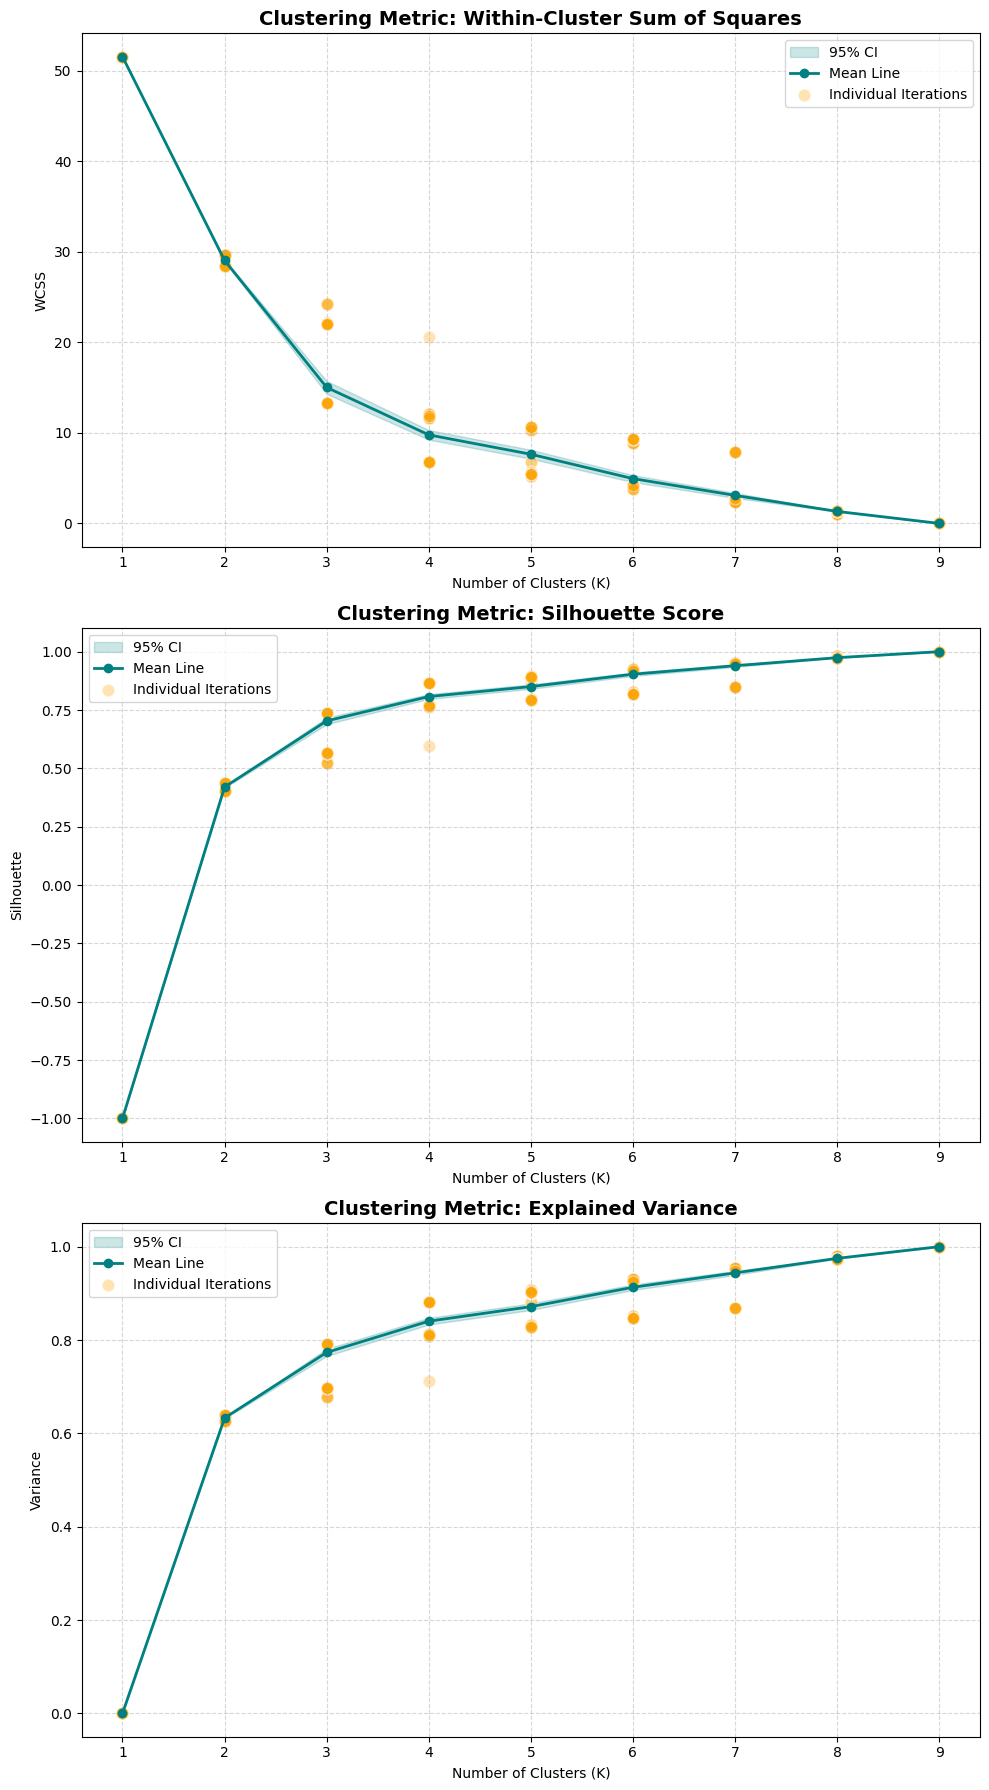

- From the graph we tested on 30 random seeds for differnece K (9), and collected the metrice (WCSS, Explainred Variance, Silhouette Score). Our results are show the every metric can show the elbow graph. And 
- Optimal Clusters: All three graphs converge on K=3 as the primary elbow point. Where you maximize information gain while minimizing complexity.
- Stability: The 95% Confidence Interval (shaded teal area) is very narrow for most K values. This indicates that your K-means implementation is robust; the random seed has a minimal effect on the final outcome for this specific dataset.
- Local Optima: The scatter of orange dots at K=3 and K=4 in the WCSS and Silhouette plots suggests these are the most "unstable" cluster counts. If you choose K=3, it is worth running the algorithm a few times with different seeds to ensure you don't get stuck in one of those lower-performing local optima.

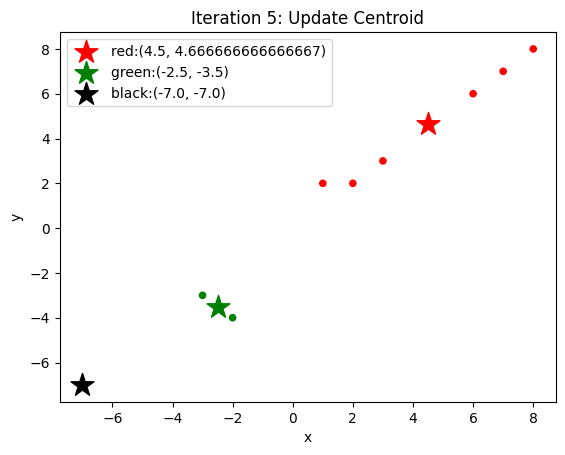

- **Although K=4 can seperate data better than K=3 but, their is the group with only 1 member, which is centroid. If you don't care about 1 member for each group, we can consider to select K=4 too**

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 1. Setup the grid dimensions
# rows = 3
# cols = 3
# fig, axes = plt.subplots(rows, cols, figsize=(15, 12), sharey=True) # sharey is helpful here
# axes = axes.flatten() 

# # 2. Iterate through each K and plot jittered scatter
# for i in range(max_K):
#     k_value = i + 1
#     subset = df_results[df_results['K'] == k_value]['Silhouette']
    
#     # Create X-jitter: an array of zeros plus small random noise
#     # We use a scale of 0.05 to keep the "strip" narrow
#     jitter = np.random.normal(0, 0.05, size=len(subset))
#     x_positions = np.ones(len(subset)) + jitter
    
#     # Plot the scatter data
#     axes[i].scatter(x_positions, subset, color='teal', alpha=0.6, 
#                     edgecolors='white', s=60, label='Seeds')
    
#     # Optional: Add a red line for the mean to show the center
#     axes[i].hlines(subset.mean(), 0.8, 1.2, colors='orange', linestyles='--', lw=2)
    
#     # Formatting each subplot
#     axes[i].set_title(f'K = {k_value}', fontsize=12)
#     axes[i].set_xlim(0.5, 1.5) # Center the jitter around 1.0
#     axes[i].set_xticks([])    # Hide X ticks as they aren't meaningful here
    
#     if i >= 6: axes[i].set_xlabel('Random Seed Jitter')
#     if i % 3 == 0: axes[i].set_ylabel('Silhouette Score')
    
#     axes[i].grid(axis='y', linestyle='--', alpha=0.4)

# # 3. Overall formatting
# plt.suptitle('Jittered Scatter of Silhouette Scores per K (30 Seeds)', fontsize=16, y=0.96)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

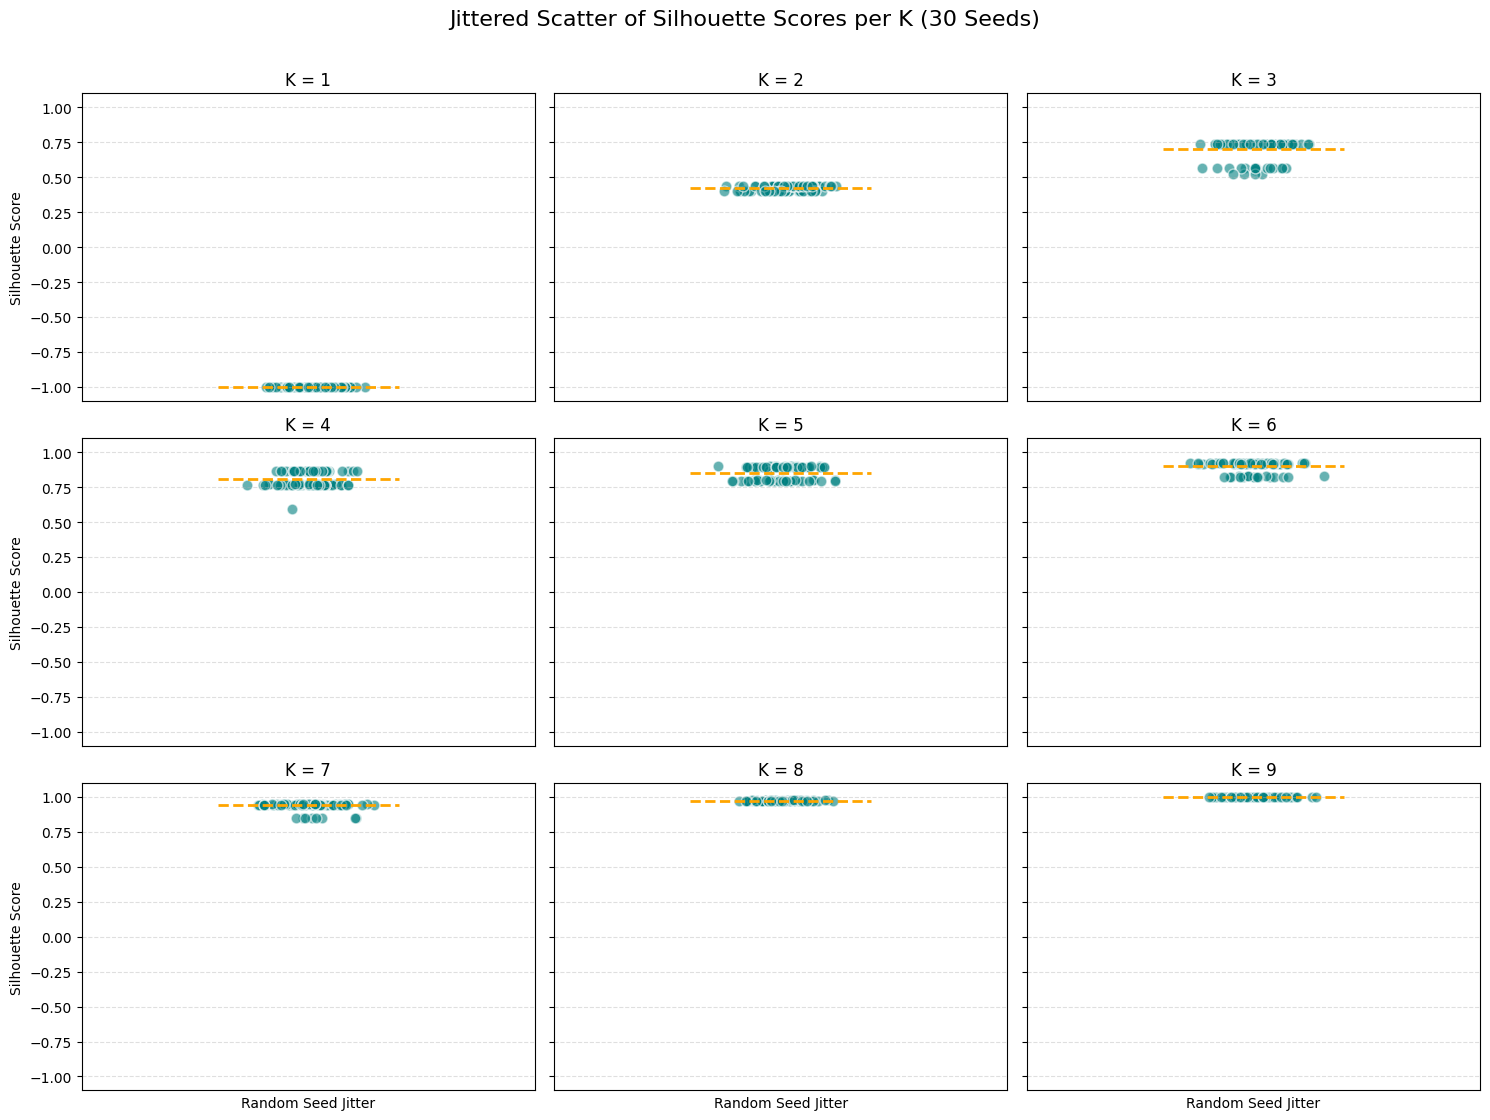

These graphs illustrate the distribution of Silhouette Scores across 100 random seeds for each value of K. The results indicate that variance is highest at K=3, suggesting that the model's ability to separate clusters is highly sensitive to initialization, leading to both 'better' and 'worse' outcomes at this level. In contrast, at K=4, the variance is significantly lower, indicating more stable convergence. As K increases further, the clusters explain a greater proportion of the variance and demonstrate the ability to separate the data into various distinct combinations.